In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
from scipy import stats
import statistics 
from statistics import mode
from collections import Counter
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from itertools import permutations
from sklearn.metrics import f1_score
%matplotlib inline

In [2]:
#Question 1

In [3]:
#PRE TASK WORK i.e data reading and feature extraction
def readData(folder_name):
    data = []
    Categories = ['cats','dogs']
    for category in Categories:
        folder = os.path.join(folder_name,category)
        label = Categories.index(category)
        for img in os.listdir(folder):
            img_path = os.path.join(folder,img)
            img_array = cv2.imread(img_path)
            data.append([img_array, label])
    X = []
    Y = []
    for features,labels in data:
        X.append(features)
        Y.append(labels)
    X = np.array(X, dtype = object)
    Y = np.array(Y, dtype = int)
    return X,Y
def make_hog(img_array):
    resized_img = []
    hog_imgA = []
    fdA = []    
    for i in range (len(img_array)):
        resized_img.append(resize(img_array[i], (64,32)))
        fd, hog_img = hog(resized_img[i], orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
        fdA.append(fd)
        hog_imgA.append(hog_img)
    DATA = np.array(fdA)
    return DATA

In [4]:
#Data and label saved
TRAIN  = make_hog(readData('training_set')[0])
TEST = make_hog(readData('test_set')[0])
Y = readData('test_set')[1]
YT = readData('training_set')[1]

In [6]:
#TASK 1
def my_mode(sample):
    c = Counter(sample)
    return [k for k, v in c.items() if v == c.most_common(1)[0][1]]
def k_nn(k,test_n, norm):
    dist = []
    for j in range (test_n):
        for i in range (len(TRAIN)):
            if norm == 0:
                distances = np.sqrt(np.sum(np.square(TEST[j] - TRAIN[i])))
            if norm == 1:
                distances = np.sum(abs(TEST[j] - TRAIN[i]))
            dist.append(distances)
    dist = np.array(dist)
    dist = dist.reshape(len(TRAIN),len(TEST))
    lab_dist = np.column_stack((dist,YT))
    Yhat = []
    for i in range (len(TEST)):
        sort_dist = lab_dist[np.argsort(lab_dist[:, i])]
        k_nn = sort_dist[0:k]
        m = my_mode(k_nn[:, (len(TEST))])
        Yhat.append(m)
    return Yhat
print(k_nn(7,len(TEST),0))

[[1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0]

In [7]:
#Task 2
#confusion matrix
def confusion_M(k, norm):
    currentDataClass = Y
    predictedClass = k_nn(k,len(TEST),norm)
    classes = set(currentDataClass)
    number_of_classes = len(classes)
    conf_matrix = pd.DataFrame(np.zeros((number_of_classes, number_of_classes),dtype=int),index=classes,columns=classes)
    for i, j in zip(currentDataClass,predictedClass):
        conf_matrix.loc[i, j] += 1
    return conf_matrix
print(confusion_M(7,0))

    0    1
0  79  921
1  86  914


In [8]:
#Accuracy
#F1 score

def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual))
print('accuracy = ',accuracy_metric(Y, k_nn(7,len(TEST), 0)))
def f_1(k,norm):
    C = confusion_M(k, norm)
    tp = C[0][0]
    tn = C[1][1]
    fp = C[1][0]
    fn = C[0][1]
    f1 = (2*tp)/((2*tp)+fp+fn)
    return f1
print('f1_score = ',f_1(7,0))

print('F1 Score is the weighted average of Precision and Recall')
print('Therefore, this score takes both false positives and false negatives into account')
print('Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy,')
print('especially if you have an uneven class distribution')
print('Accuracy works best if false positives and false negatives have similar cost')
print('If the cost of false positives and false negatives are very different')
print('It’s better to look at both Precision and Recall')
print('Moreover, F1 lets us give weight to "how many more" times we prefer recall over precision')

accuracy =  0.4965
f1_score =  0.1356223175965665
F1 Score is the weighted average of Precision and Recall
Therefore, this score takes both false positives and false negatives into account
Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy,
especially if you have an uneven class distribution
Accuracy works best if false positives and false negatives have similar cost
If the cost of false positives and false negatives are very different
It’s better to look at both Precision and Recall
Moreover, F1 lets us give weight to "how many more" times we prefer recall over precision


In [9]:
#Task 3
for i in range(1,8):
    print('k =',i)
    for j in range (2):
        if j == 0:
            print('Euclidean')
            print(k_nn(i, len(TEST), j))
        if j == 1:
            print('Manhattan')
            print(k_nn(i, len(TEST), j))

k = 1
Euclidean
[[0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.

In [10]:
#Task 4
def k_nn_tieBreaker(k,test_n, norm):
    dist = []
    for j in range (test_n):
        for i in range (len(TRAIN)):
            if norm == 0:
                distances = np.sqrt(np.sum(np.square(TEST[j] - TRAIN[i])))
            if norm == 1:
                distances = np.sum(abs(TEST[j] - TRAIN[i]))
            dist.append(distances)
    dist = np.array(dist)
    dist = dist.reshape(len(TRAIN),len(TEST))
    lab_dist = np.column_stack((dist, YT))
    Yhat = []
    for i in range (len(TEST)):
        sort_dist = lab_dist[np.argsort(lab_dist[:, i])]
        k_nn = sort_dist[0:k]
        m = my_mode(k_nn[:, (len(TEST))])
        if (len(m) > 1):
            for i in range (len(TEST)):
                sort_dist = lab_dist[np.argsort(lab_dist[:, i])]
                k = k-1
                k_nn = sort_dist[0:k]
                m = my_mode(k_nn[:, (len(TEST))])
                if k == 1:
                    break
        Yhat.append(m)
    return Yhat

In [11]:
Y_hat_E = []
Y_hat_M = []
for i in range(1,8):
    print('k =',i)
    for j in range (2):
        if j == 0:
            print('Euclidean')
            print(k_nn_tieBreaker(i, len(TEST), j))
            Y_hat_E.append(k_nn_tieBreaker(i, len(TEST), j))
        if j == 1:
            print('Manhattan')
            print(k_nn_tieBreaker(i, len(TEST), j))
            Y_hat_M.append(k_nn_tieBreaker(i, len(TEST), j))
Y_hat_E = np.array(Y_hat_E)
Y_hat_M = np.array(Y_hat_M)

k = 1
Euclidean
[[0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.

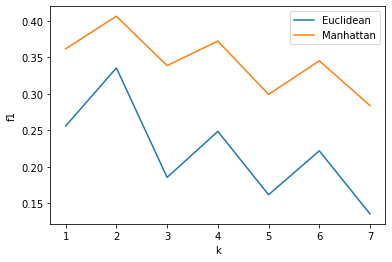

In [12]:
#Task 5
F1E = []
F1M = []
k=[]
for i in range (1,8):
    F1E.append(f_1(i, 0))
    F1M.append(f_1(i, 1))
    k.append(i)
plt.plot(k,F1E, label = 'Euclidean')
plt.plot(k,F1M, label = 'Manhattan')
plt.xlabel("k")
plt.ylabel("f1")
plt.legend()
plt.show()

In [15]:
#QUESTION 2

In [15]:
k_range = range (1,8)
scores = {}
scores_listE = []
scores_listM = []
print('Euclidean')
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(TRAIN,YT)
    YhatE = knn.predict(TEST)
    scores[k] = metrics.accuracy_score(Y,YhatE)
    scores_listE.append(metrics.accuracy_score(Y,YhatE))
    print('k =',k)
    print('accuracy = ',accuracy_score(Y, YhatE))
    print('f1 score = ',f1_score(Y, YhatE, average = 'macro'))
    print('confusion matrix = \n',confusion_matrix(Y, YhatE))
print('Manhattan')
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn.fit(TRAIN,YT)
    YhatM = knn.predict(TEST)
    scores[k] = metrics.accuracy_score(Y,YhatM)
    scores_listM.append(metrics.accuracy_score(Y,YhatM))
    print('k =',k)
    print('accuracy = ',accuracy_score(Y, YhatM))
    print('f1 score = ',f1_score(Y, YhatM, average = 'macro'))
    print('confusion matrix = \n',confusion_matrix(Y, YhatM))

Euclidean
k = 1
accuracy =  0.6025
f1 score =  0.5815999774748165
confusion matrix = 
 [[379 621]
 [174 826]]
k = 2
accuracy =  0.6385
f1 score =  0.6373008258554846
confusion matrix = 
 [[581 419]
 [304 696]]
k = 3
accuracy =  0.6165
f1 score =  0.5852483602574922
confusion matrix = 
 [[342 658]
 [109 891]]
k = 4
accuracy =  0.6435
f1 score =  0.6320371286406972
confusion matrix = 
 [[467 533]
 [180 820]]
k = 5
accuracy =  0.6145
f1 score =  0.577343298383297
confusion matrix = 
 [[318 682]
 [ 89 911]]
k = 6
accuracy =  0.6315
f1 score =  0.6113868401452686
confusion matrix = 
 [[404 596]
 [141 859]]
k = 7
accuracy =  0.605
f1 score =  0.5627043250202872
confusion matrix = 
 [[294 706]
 [ 84 916]]
Manhattan
k = 1
accuracy =  0.6385
f1 score =  0.6315336837075968
confusion matrix = 
 [[501 499]
 [224 776]]
k = 2
accuracy =  0.6545
f1 score =  0.6535082540000114
confusion matrix = 
 [[708 292]
 [399 601]]
k = 3
accuracy =  0.644
f1 score =  0.6332766422974188
confusion matrix = 
 [[473 

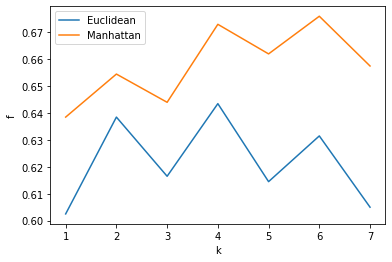

In [16]:
plt.plot(k_range,scores_listE, label = 'Euclidean')
plt.plot(k_range,scores_listM, label = 'Manhattan')
plt.xlabel("k")
plt.ylabel("f")
plt.legend()

In [18]:
#Question 3

In [17]:
#PRE TASK WORK i.e data reading and feature extraction
def readData_N(folder_name, category_names):
    data = []
    Categories = category_names
    for category in Categories:
        folder = os.path.join(folder_name,category)
        label = Categories.index(category)
        for img in os.listdir(folder):
            img_path = os.path.join(folder,img)
            img_array = cv2.imread(img_path)
            data.append([img_array, label])
    X = []
    Y = []
    for features, labels in data:
        X.append(features)
        Y.append(labels)
    X = np.array(X)
    Y = np.array(Y, dtype = int)
    return X,Y
def feature_extract(img_array):
    resized_img = []
    flat_image = []
    fdA = []    
    for i in range (len(img_array)):
        resized_img.append(resize(img_array[i], (32,32)))
        flattened = np.array(resized_img[i].flatten())
        flat_image.append(flattened)
    DATA = np.array(flat_image)
    return DATA
#feature_extract(readData('TTTRAIN', ['Cloudy', 'Rain', 'Shine', 'Sunrise'])[0])

In [20]:
TRAIN_N  = feature_extract(readData_N('Training data', ['Cloudy', 'Rain', 'Shine', 'Sunrise'])[0])
TEST_N = feature_extract(readData_N('Test data', ['Cloudy', 'Rain', 'Shine', 'Sunrise'])[0])
Y_N = readData_N('Test data', ['Cloudy', 'Rain', 'Shine', 'Sunrise'])[1]
YT_N = readData_N('Training data', ['Cloudy', 'Rain', 'Shine', 'Sunrise'])[1]

In [21]:
#Task 1
def my_mode(sample):
    c = Counter(sample)
    return [k for k, v in c.items() if v == c.most_common(1)[0][1]]
def k_nn_N(k,test_n, norm):
    dist = []
    for j in range (test_n):
        for i in range (len(TRAIN_N)):
            if norm == 0:
                distances = np.sqrt(np.sum(np.square(TEST_N[j] - TRAIN_N[i])))
            if norm == 1:
                distances = np.sum(abs(TEST_N[j] - TRAIN_N[i]))
            dist.append(distances)
    dist = np.array(dist)
    dist = dist.reshape(len(TRAIN_N),len(TEST_N))
    lab_dist = np.column_stack((dist, YT_N))
    Yhat_N = []
    for i in range (len(TEST_N)):
        sort_dist = lab_dist[np.argsort(lab_dist[:, i])]
        k_nn = sort_dist[0:k]
        m = my_mode(k_nn[:, (len(TEST_N))])
        Yhat_N.append(m)
    return Yhat_N
print(k_nn_N(7, len(TEST_N), 0))

[[0.0], [0.0], [0.0], [1.0, 3.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0, 3.0], [0.0], [0.0], [2.0, 0.0, 3.0], [0.0], [3.0], [0.0], [0.0], [0.0, 3.0], [0.0], [0.0], [0.0, 3.0], [3.0], [0.0], [3.0], [0.0], [0.0], [0.0], [0.0], [3.0], [0.0], [3.0], [0.0], [0.0], [0.0], [3.0], [0.0], [3.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [3.0], [0.0], [0.0], [0.0], [3.0], [0.0], [0.0], [0.0], [0.0], [3.0], [0.0], [1.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [3.0], [0.0], [1.0, 0.0], [3.0], [0.0], [3.0], [0.0], [0.0, 1.0], [0.0, 1.0], [0.0], [1.0, 0.0], [0.0], [0.0], [0.0], [3.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [3.0], [3.0], [0.0], [0.0], [3.0], [3.0], [1.0], [3.0], [3.0], [1.0], [0.0], [0.0], [1.0], [0.0], [3.0], [0.0], [2.0, 1.0, 3.0], [3.0], [0.0], [1.0], [1.0, 0.0], [1.0], [3.0], [0.0], [1.0], [0.0], [0.0], [0.0], [1.0], [3.0, 0.0, 1.0], [0.0, 1.0, 3.0], [1.0], [1.0, 0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0, 1.0], [1.0], [0.0], [1.0, 0.0], [1.0, 0.0]

In [22]:
#Task 2
#confusion matrix
currentDataClass = Y_N
predictedClass = k_nn_N(7,len(TEST_N),0)

classes = set(currentDataClass)
number_of_classes = len(classes)

conf_matrix = pd.DataFrame(
    np.zeros((number_of_classes, number_of_classes),dtype=int),
    index=classes,
    columns=classes)

for i, j in zip(currentDataClass,predictedClass):
        conf_matrix.loc[i, j] += 1

print(conf_matrix.values)

[[47  3  1 15]
 [25  9  1 13]
 [33 27  3  8]
 [51 22  0 10]]


In [37]:
#Accuracy and f1_score
'''
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual))
'''
'''
def f1_macro(pred, true, classes):
  f1 = np.zeros(classes)
  for i in range(classes):
      TP = 0
      TN = 0
      FP = 0
      FN = 0
      for j in range(pred):
          if pred[j] == i and i == true[j]:
              TP += 1
          elif pred[j] != i and i != true[j]:
              TN += 1

          elif pred[i] == i and i != true[j]:
              FP += 1
          elif pred[i] != i and i == true[j]:
              FN += 1
      f1[i] = 2*TP / (2*TP + FP + FN)
  return np.mean(f1)
'''
print('accuracy = ', accuracy_score(Y_N, k_nn_NB(7, len(TEST_N), 0)))
print('f1 score = ', f1_score(Y_N, k_nn_NB(7, len(TEST_N), 0), average= 'macro'))

accuracy =  0.28125
f1 score =  0.24425265037384222


In [28]:
#Task 3
for i in range(1,8):
    print('k =',i)
    for j in range (2):
        if j == 0:
            print('Euclidean')
            print(k_nn_N(i, len(TEST_N), j))
        if j == 1:
            print('Manhattan')
            print(k_nn_N(i, len(TEST_N), j))

k = 1
Euclidean
[[0.0], [0.0], [0.0], [1.0], [3.0], [1.0], [1.0], [0.0], [0.0], [0.0], [3.0], [0.0], [2.0], [3.0], [3.0], [3.0], [0.0], [0.0], [0.0], [0.0], [0.0], [3.0], [1.0], [0.0], [0.0], [0.0], [3.0], [0.0], [2.0], [0.0], [3.0], [0.0], [0.0], [3.0], [3.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [3.0], [0.0], [0.0], [3.0], [2.0], [0.0], [0.0], [1.0], [0.0], [1.0], [3.0], [1.0], [0.0], [2.0], [1.0], [1.0], [0.0], [2.0], [0.0], [3.0], [0.0], [3.0], [1.0], [1.0], [2.0], [0.0], [3.0], [3.0], [3.0], [0.0], [0.0], [1.0], [2.0], [2.0], [2.0], [1.0], [0.0], [0.0], [3.0], [0.0], [0.0], [0.0], [0.0], [0.0], [3.0], [0.0], [0.0], [3.0], [3.0], [3.0], [0.0], [3.0], [2.0], [0.0], [0.0], [3.0], [0.0], [1.0], [1.0], [2.0], [3.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [0.0], [0.0], [1.0], [3.0], [0.0], [1.0], [1.0], [2.0], [1.0], [1.0], [0.0], [3.0], [1.0], [0.0], [1.0], [3.0], [1.0], [1.0], [2.0], [0.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.

In [30]:
#Task 4
def k_nn_NB(k,test_n, norm):
    dist = []
    for j in range (test_n):
        for i in range (len(TRAIN_N)):
            if norm == 0:
                distances = np.sqrt(np.sum(np.square(TEST_N[j] - TRAIN_N[i])))
            if norm == 1:
                distances = np.sum(abs(TEST_N[j] - TRAIN_N[i]))
            dist.append(distances)
    dist = np.array(dist)
    dist = dist.reshape(len(TRAIN_N),len(TEST_N))
    lab_dist = np.column_stack((dist, YT_N))
    Yhat_N = []
    for i in range (len(TEST_N)):
        sort_dist = lab_dist[np.argsort(lab_dist[:, i])]
        k_nn = sort_dist[0:k]
        m = my_mode(k_nn[:, (len(TEST_N))])
        if (len(m) > 1):
            for i in range (len(TEST_N)):
                sort_dist = lab_dist[np.argsort(lab_dist[:, i])]
                k = k-1
                k_nn = sort_dist[0:k]
                m = my_mode(k_nn[:, (len(TEST_N))])
                if k == 1:
                    break
        Yhat_N.append(m)
    return Yhat_N

In [31]:
for i in range(1,8):
    print('k =',i)
    for j in range (2):
        if j == 0:
            print('Euclidean')
            print(k_nn_NB(i, len(TEST_N), j))
        if j == 1:
            print('Manhattan')
            print(k_nn_NB(i, len(TEST_N), j))

k = 1
Euclidean
[[0.0], [0.0], [0.0], [1.0], [3.0], [1.0], [1.0], [0.0], [0.0], [0.0], [3.0], [0.0], [2.0], [3.0], [3.0], [3.0], [0.0], [0.0], [0.0], [0.0], [0.0], [3.0], [1.0], [0.0], [0.0], [0.0], [3.0], [0.0], [2.0], [0.0], [3.0], [0.0], [0.0], [3.0], [3.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [3.0], [0.0], [0.0], [3.0], [2.0], [0.0], [0.0], [1.0], [0.0], [1.0], [3.0], [1.0], [0.0], [2.0], [1.0], [1.0], [0.0], [2.0], [0.0], [3.0], [0.0], [3.0], [1.0], [1.0], [2.0], [0.0], [3.0], [3.0], [3.0], [0.0], [0.0], [1.0], [2.0], [2.0], [2.0], [1.0], [0.0], [0.0], [3.0], [0.0], [0.0], [0.0], [0.0], [0.0], [3.0], [0.0], [0.0], [3.0], [3.0], [3.0], [0.0], [3.0], [2.0], [0.0], [0.0], [3.0], [0.0], [1.0], [1.0], [2.0], [3.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [0.0], [0.0], [1.0], [3.0], [0.0], [1.0], [1.0], [2.0], [1.0], [1.0], [0.0], [3.0], [1.0], [0.0], [1.0], [3.0], [1.0], [1.0], [2.0], [0.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.

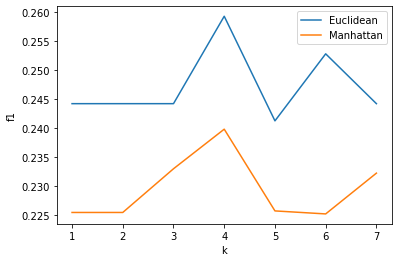

In [32]:
#Task 5
F1E_N = []
F1M_N = []
k_N=[]
for i in range (1,8):
    F1E_N.append(f1_score(Y_N, k_nn_NB(i,len(TEST_N), 0), average= 'macro'))
    F1M_N.append(f1_score(Y_N, k_nn_NB(i,len(TEST_N), 1), average='macro'))
    k_N.append(i)
plt.plot(k_N,F1E_N, label = 'Euclidean')
plt.plot(k_N,F1M_N, label = 'Manhattan')
plt.xlabel("k")
plt.ylabel("f1")
plt.legend()
plt.show()